### PROJECT: INVESTIGATE A DATASET - [NO-SHOW APPOINTMENTS]

### Table of Contents

1. Introduction

2. Data Wrangling

3. Exploratory Data Analysis

4. Conclusions

### 1. INTRODUCTION

### Dataset Description

   This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program.

### Questions for Analysis

###### Q1. What is the ratio of Male to Female Patient in the dataframe?
###### Q2. Does the Gender of the patients affect the showing up for their appointments?
###### Q3. Does non_handicap patients show up more than the handicap patients?
###### Q4. Does messaging the patients affect the showing up for their appointments?

In [1]:
# Import Libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Csv file
df=pd.read_csv('appointment.csv')

### 2. DATA WRANGLING

In [3]:
# Show the first 5 columns of dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Show the shape of dataframe
df.shape

(110527, 14)

In [5]:
# Drop unnecessary column from the dataframe
df.drop(['PatientId'], axis=1, inplace=True)

In [6]:
# To re-confirm
df.shape

(110527, 13)

The following column labels needs to be renamed: AppointmentID,  ScheduledDay,  AppointmentDay,  Neighbourhood,  Hipertension,  Handcap and  No-show.

In [7]:
# To rename the column labels
df.rename(columns={'AppointmentID': 'Appointment_Id', 'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)

In [8]:
# To re-confirm
df.head(1)

,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
# Checck for missing value in the columns
df.isnull().sum()

Appointment_Id     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighborhood       0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No_show            0
dtype: int64

No null or missing value in the columns

In [10]:
# Check for number of duplicate rows in the dataframe
sum(df.duplicated())

0

There is no duplicate rows in the dataframe

In [11]:
# Show the datatype of the columns in dataframe
df.dtypes

Appointment_Id      int64
Gender             object
Scheduled_Day      object
Appointment_Day    object
Age                 int64
Neighborhood       object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show            object
dtype: object

In [12]:
# Check the number and counts of unique rows in the column 'Handicap'
df.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

Value_counts of column 'Handicap' 2, 3, 4 has to be merged with 1

In [13]:
# To replace items on a particular column
df['Handicap'].replace(2 , 1 ,inplace=True)

In [14]:
# To replace items on a particular column
df['Handicap'].replace(3 , 1 ,inplace=True)

In [15]:
# To replace items on a particular column
df['Handicap'].replace(4 , 1 ,inplace=True)

In [16]:
# Re-confirm the column 'Handicap'
df.Handicap.value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

'Scheduled_Day' and 'Appointment_Day' datatypes needs to be changed to 'datetime' datatype

In [17]:
# Convert datatypes of 'Scheduled_Day' from 'object' to 'datetime'
df.Scheduled_Day = pd.to_datetime(df.Scheduled_Day)

In [18]:
# Convert datatypes of 'Appointment_Day' from 'object' to 'datetime'
df.Appointment_Day = pd.to_datetime(df.Appointment_Day)

In [19]:
# To Re-check
df.head()

,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Colomn 'No_show' datas need to be changed from 'Yes, No' to Numeric

In [20]:
# Replace items on 'No_show' column with with numeric data.
df['No_show'] = df['No_show'].map(
                   {'Yes': 1 ,'No': 0})

In [21]:
# To re-confirm
df.No_show.value_counts()

0    88208
1    22319
Name: No_show, dtype: int64

In [22]:
# Check number and counts of unique values in column 'Age'
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Column 'Age' contains irregular value '-1' which has to be dropped.

In [23]:
# Drop row '-1' of column 'Age'
df.drop(df.query("Age == -1").index,inplace=True)

In [24]:
# To re-confirm
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [25]:
# Re-check the first 5 columns of dataframe
df.head()

,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


The following has been done on the data set;

    1. Unnecessary column has been droped.
    
    2. Some column labels have been renamed.
    
    3. Some rows have been modified.


In [26]:
# Save your datasets as new files!
df.to_csv('appointment_v2.csv', index=False)

### 3. EXPLORATORY DATA ANALYSIS

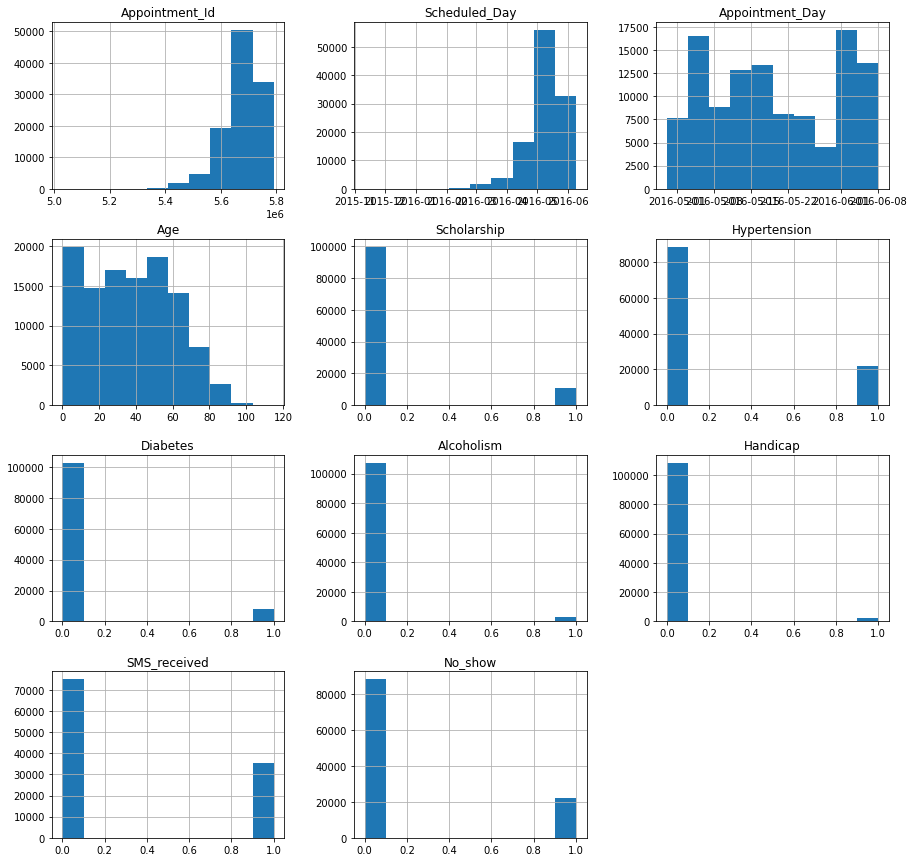

In [27]:
df.hist(figsize = (15, 15));

In [28]:
df.head(0)

,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


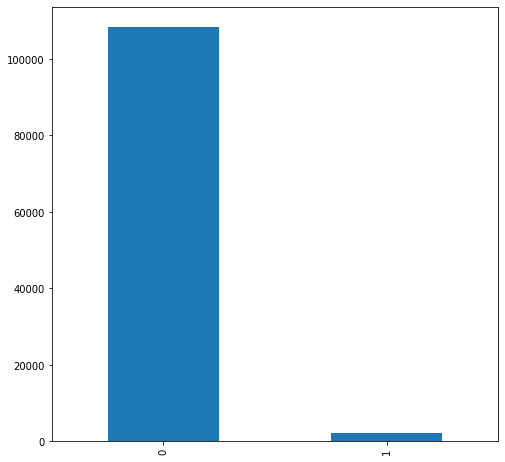

In [29]:
# Chart of Handicap
df['Handicap'].value_counts().plot(kind='bar', figsize = (8,8));

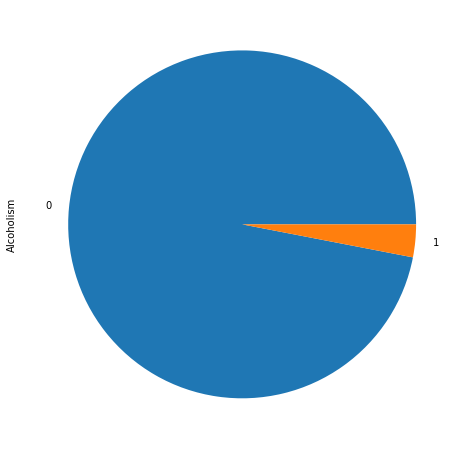

In [30]:
# Chart of Alcoholism
df['Alcoholism'].value_counts().plot(kind='pie', figsize = (8,8));

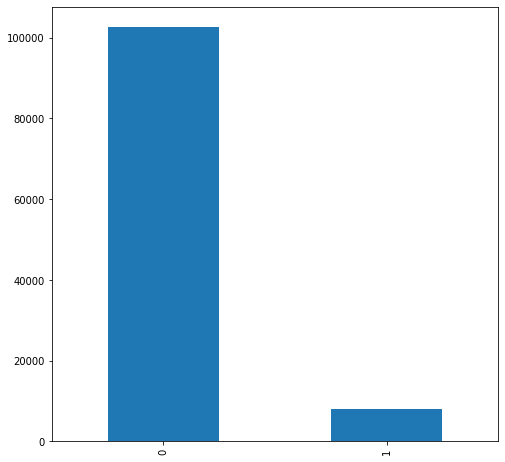

In [31]:
# Chart of Diabetes
df['Diabetes'].value_counts().plot(kind='bar', figsize = (8,8));

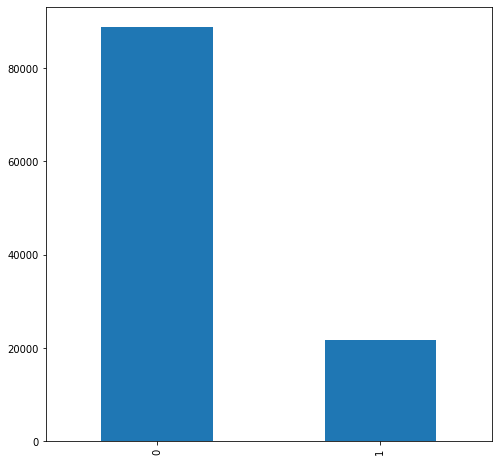

In [32]:
# Chart of Hypertension
df['Hypertension'].value_counts().plot(kind='bar', figsize = (8,8));

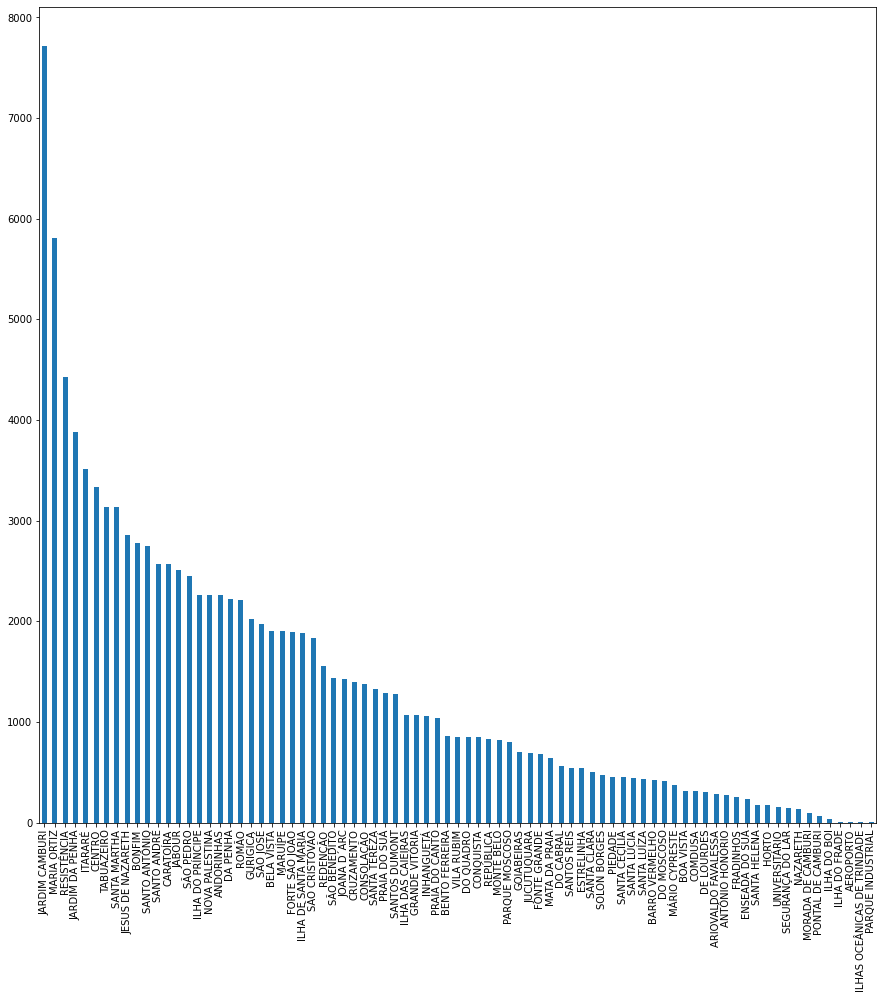

In [33]:
# Chart of Neighborhood
df['Neighborhood'].value_counts().plot(kind='bar', figsize = (15,15));

###### Q1. What is the ratio of Male to Female Patient in the dataframe?

In [34]:
round(df.Gender.value_counts()/len(df)*100)

F    65.0
M    35.0
Name: Gender, dtype: float64

Percentage of Female is 65

Percentage of Male is 35

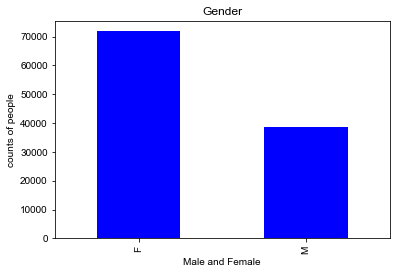

In [35]:
df.Gender.value_counts().plot(kind="bar",color="blue")
plt.style.use('seaborn')
plt.title("Gender")
plt.xlabel('Male and Female')
plt.ylabel('counts of people')
plt.show()

The proportion of females is greater than that of males (the number of females is near twice the number of men)

###### Q2. Does the Gender of the patients affect the showing up for their appointments?

In [36]:
Gender_count = df.groupby("Gender")["No_show"].value_counts()
print(Gender_count)


Gender  No_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


In [37]:
def MyHistplot(df, xVar, figsize = (14, 6), stacked = True, normalize = False):
    df.groupby(xVar)['No_show'].value_counts(normalize = normalize).mul(int(f'{100 if normalize else 1}')).round(2).unstack().plot(kind="bar",
                                                                                                                                 stacked=stacked, 
                                                                                                                                 figsize=figsize,
                                                                                                                                width=0.7,
                                                                                                                                edgecolor='white',
                                                                                                                                 rot= 0);
    plt.ylabel("missing appointments")
    plt.title(f"percentage of missing appointments across all {xVar}".title(),fontsize = 18, weight='bold');
    if normalize :
        plt.axhline(df['No_show'].value_counts(normalize = True).mul(100)[0],
                   color = 'maroon', ls = '-.', alpha = 0.75, label = 'proportion of Attendance\n (All patients)')
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

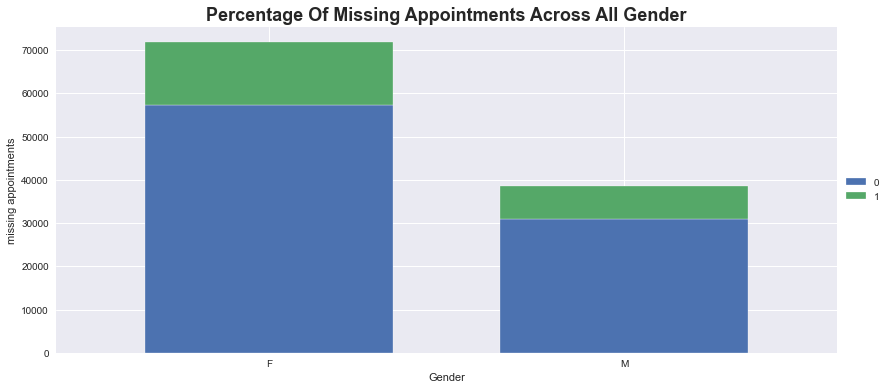

In [38]:
MyHistplot(df, 'Gender')

###### Results

    a. we could say that there is no correlation between gender alone and missing the appointment.

    b. The percentage of male and female patients missing their appointments is the same as the general average.

###### Q3. Does non_handicap patients show up more than the handicap patients?

In [39]:
Handicap_count = df.groupby("Handicap")["No_show"].value_counts()
print(Handicap_count)


Handicap  No_show
0         0          86373
          1          21912
1         0           1834
          1            407
Name: No_show, dtype: int64


In [40]:
def MyHistplot(df, xVar, figsize = (14, 6), stacked = True, normalize = False):
    df.groupby(xVar)['No_show'].value_counts(normalize = normalize).mul(int(f'{100 if normalize else 1}')).round(2).unstack().plot(kind="bar",
                                                                                                                                 stacked=stacked, 
                                                                                                                                 figsize=figsize,
                                                                                                                                width=0.7,
                                                                                                                                edgecolor='white',
                                                                                                                                 rot= 0);
    plt.ylabel("missing appointments")
    plt.title(f"possibility of Handicaps missing appointments {xVar}".title(),fontsize = 18, weight='bold');
    if normalize :
        plt.axhline(df['No_show'].value_counts(normalize = True).mul(100)[0],
                   color = 'maroon', ls = '-.', alpha = 0.75, label = 'proportion of Attendance\n (All patients)')
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

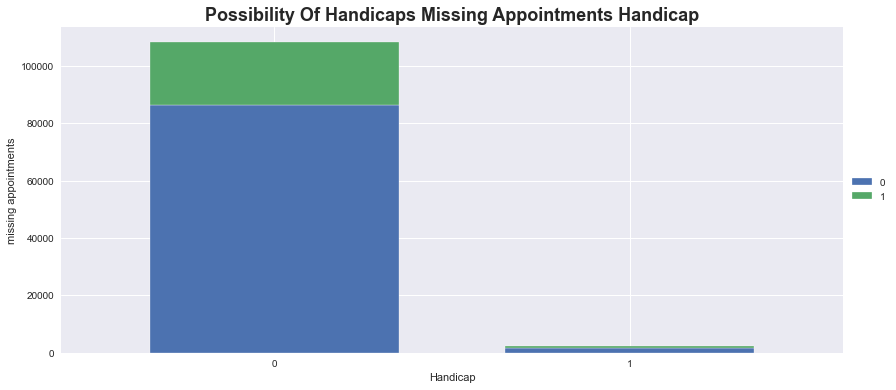

In [41]:
MyHistplot(df, 'Handicap')

###### Results

The above results shows that the proportion of Handicap patient showing up for appointment is almost the same thing as that of Non-handicap.  Thus being Handicap only does not influence the 'No_show' for the appointment.

###### Q4. Does messaging the patients affect the showing up for their appointments?

In [42]:
df.head(0)

,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [43]:
# Percentage of the patients that showed up compare with those that did not show up
round(df.No_show.value_counts()/len(df)*100)

0    80.0
1    20.0
Name: No_show, dtype: float64

The result above shows that 80% of the patients showed up, while 20% of the patients did not show up.

In [44]:
# Comparison of the percentage of SMS_received with No_show
SMS_received_count = round(df.groupby("SMS_received")["No_show"].value_counts()/len(df)*100)
print(SMS_received_count)


SMS_received  No_show
0             0          57.0
              1          11.0
1             0          23.0
              1           9.0
Name: No_show, dtype: float64


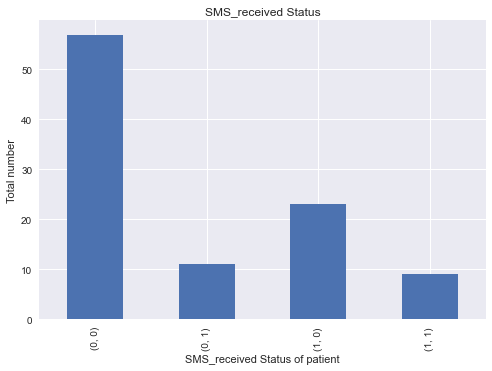

In [45]:
SMS_received_count = round(df.groupby("SMS_received")["No_show"].value_counts()/len(df)*100).plot(kind='bar',title='SMS_received Status',ylabel='Total number',xlabel='SMS_received Status of patient')

###### Results

The result above shows that 57% of the patient that does not recieve SMS showhed up for their appointment, while 11% did not show up. And 23% of the patient that recieve SMS showed up, while 9% did not show up.

            The results above clearly indicates that SMS_received only does not influence the showing up of the patients for appointments.

### 4. CONCLUSIONS

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.

    There are 12 independent variables and 1 dependent variable. The following are deduced from careful analysis of the dataset:
    
    The result above shows that 80% of the patients showed up, while 20% of the patients did not show up.
    
              We could say that there is no adequate correlation between gender alone and missing the appointment, as the proportion of male and female patients missing their appointments is the same as the general average.
          
          The proportion of Handicap patient showing up for appointment is almost the same thing as that of Non-handicap. Thus being Handicap only does not influence the 'No_show' for the appointment. neither does  SMS_received only influence the showing up of the patients for appointments.

##### Limitations

The combined effect of the 12 independent variables could have more influence on the dependent variable but the timelimit for the research analysis could not permit the careful examination.

In [46]:
from subprocess import call
call (['python', '-m', 'nbconvert', 'PROJECT 1_SUBMITTED.ipynb'])

1